In [1]:
import pandas as pd
import re


def ux_100_03m_read(input_path, output_path = None, format_ = 'csv', t_scale = 'C', save = True):
    '''
    Parameters
    ----------
    input_path : string path of input file (file name included)
    output_path : string path of output file (file name included, preprocessing needed)
    format_ : input file format (only csv or xls/xlsx is accepted)       
    t_scale : C or F
    save: whether saving the output is requested
       

    Returns
    -------
    dataframe of cleaned time-series sensor data

    '''
        
    # If save is True, ensure output_path is provided
    if save and not output_path:
        raise ValueError('Output path is required when save = True.')
    
    # Check file formatting
    if format_ == 'csv':
        df = pd.read_csv(input_path, skiprows = 1)
    elif (format_ == 'xlsx') | (format_ == 'xls'):
        df = pd.read_excel(input_path, skiprows = 1)
    else:
        raise ValueError('Not a common HOBO raw file.')
    
    # Clean up logg rows
    df = df[~df.apply(lambda row: row.astype(str).str.contains('logged', case = False, na = False).any(), axis = 1)]
        
    # Correct temperature based on function input
    col_list_correction = [col for col in df.columns if ('°C' in col) | ('°F' in col)]
    
    if t_scale == 'C':
        for col in col_list_correction:
            if not '°C' in col:
                df[col] = (df[col] - 32)/1.8
    
    elif t_scale == 'F': 
        for col in col_list_correction:
            if not '°F' in col:
                df[col] = 1.8 * df[col] + 32
    else:
        raise ValueError('Not a common temperature unit.')
    
    # Keep necessary columns
    keep_list = [df.columns[1]] + col_list_correction
    df = df[keep_list]
    col_list_correction = [re.split(r', °[CF]', s)[0] for s in col_list_correction]
    df.columns = ['Time'] + col_list_correction

    
    if save:
        df.to_excel(output_path, index = False)
    
    return df
    

# Test fucntion
input_path = r'C:\EXP\logger_data\raw\tc\4013_test.csv'
df = ux_100_03m_read(input_path, save = False)


    
def ux_100_001_read(input_path, output_path = None, format_ = 'csv', t_scale = 'C', save = True):
    '''
    Parameters (CORRECT)
    ----------
    input_path : string path of input file (file name included)
    output_path : string path of output file (file name included, preprocessing needed)
    format_ : input file format (only csv or xls/xlsx is accepted)       
    t_scale : C or F
    save: whether saving the output is requested
       

    Returns
    -------
    dataframe of cleaned time-series sensor data

    '''
        
    # If save is True, ensure output_path is provided
    if save and not output_path:
        raise ValueError('Output path is required when save = True.')
    
    # Check file formatting
    if format_ == 'csv':
        df = pd.read_csv(input_path, skiprows = 1)
    elif (format_ == 'xlsx') | (format_ == 'xls'):
        df = pd.read_excel(input_path, skiprows = 1)
    else:
        raise ValueError('Not a common HOBO raw file.')
    
    # Clean up logg rows
    df = df[~df.apply(lambda row: row.astype(str).str.contains('logged', case = False, na = False).any(), axis = 1)]
        
    # Correct temperature based on function input
    col_list_correction = [col for col in df.columns if ('°C' in col) | ('°F' in col) | ('RH, %' in col)]
    
    if t_scale == 'C':
        col_list_correction2 = [col for col in df.columns if ('°C' in col) | ('°F' in col)]
        for col in col_list_correction2:
            if not '°C' in col:
                df[col] = (df[col] - 32)/1.8
    
    elif t_scale == 'F': 
        for col in col_list_correction2:
            if not '°F' in col:
                df[col] = 1.8 * df[col] + 32
    else:
        raise ValueError('Not a common temperature unit.')
    
    # Keep necessary columns
    keep_list = [df.columns[1]] + col_list_correction
    df = df[keep_list]
    col_list_correction = [re.split(r', (°[CF]|%)', s)[0] for s in col_list_correction]
    df.columns = ['Time'] + col_list_correction

    
    if save:
        df.to_excel(output_path, index = False)
    
    return df
    
    
def mx_1101_read(input_path, output_path = None, format_ = 'csv', t_scale = 'C', save = True):
    '''
    Parameters (CORRECT)
    ----------
    input_path : string path of input file (file name included)
    output_path : string path of output file (file name included, preprocessing needed)
    format_ : input file format (only csv or xls/xlsx is accepted)       
    t_scale : C or F
    save: whether saving the output is requested
       

    Returns
    -------
    dataframe of cleaned time-series sensor data

    '''
        
    # If save is True, ensure output_path is provided
    if save and not output_path:
        raise ValueError('Output path is required when save = True.')
    
    # Check file formatting
    if format_ == 'csv':
        df = pd.read_csv(input_path, skiprows = 1)
    elif (format_ == 'xlsx') | (format_ == 'xls'):
        df = pd.read_excel(input_path, skiprows = 1)
    else:
        raise ValueError('Not a common HOBO raw file.')
    
    # Clean up logg rows
    df = df[~df.apply(lambda row: row.astype(str).str.contains('logged', case = False, na = False).any(), axis = 1)]
        
    # Correct temperature based on function input
    col_list_correction = [col for col in df.columns if ('°C' in col) | ('°F' in col) | ('RH, %' in col)]
    
    if t_scale == 'C':
        col_list_correction2 = [col for col in df.columns if ('°C' in col) | ('°F' in col)]
        for col in col_list_correction2:
            if not '°C' in col:
                df[col] = (df[col] - 32)/1.8
    
    elif t_scale == 'F': 
        for col in col_list_correction2:
            if not '°F' in col:
                df[col] = 1.8 * df[col] + 32
    else:
        raise ValueError('Not a common temperature unit.')
    
    # Keep necessary columns
    keep_list = [df.columns[1]] + col_list_correction
    df = df[keep_list]
    col_list_correction = [re.split(r', (°[CF]|%)', s)[0] for s in col_list_correction]
    df.columns = ['Time'] + col_list_correction

    
    if save:
        df.to_excel(output_path, index = False)
    
    return df
    
        

In [2]:
import pandas as pd
# from hobo_read_in import ux_100_03m_read, ux_100_001_read
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

###################################
### Step 1: Essential functions ###
###################################

def in_folder_hobo_combine(in_folder, out_folder, start_time, end_time, sensor_type = 'tc'):
    '''
    Description
    -----------
    Combines and processes sensor data from CSV files in a given output folder.

    Parameters
    ----------
    in_folder : str
        Path to the input folder (currently unused in the function).
    out_folder : str
        Path to the output folder where CSV files are located and processed Excel files will be saved.
    start_time : str
        Start time for filtering or processing data (currently not used).
    end_time : str
        End time for filtering or processing data (currently not used).

    Returns
    -------
    df_all : pandas.DataFrame
        A DataFrame containing the combined data from all processed CSV files.

    '''
    
    # Set directory and list csv files 
    os.chdir(in_folder)
    csv_files = glob.glob('*.csv', recursive=True)

    # Read all sensor data and append
    df_all = pd.DataFrame([])
    for file in csv_files:
        os.makedirs(out_folder, exist_ok = True)
        output_file = os.path.join(out_folder, file[:-4] + '_processed.xlsx')
        if sensor_type == 'tc':
            df = ux_100_03m_read(file, output_path = output_file, format_ = 'csv', t_scale = 'C', save = True)
        elif sensor_type == 'trh':
            df = ux_100_001_read(file, output_path = output_file, format_ = 'csv', t_scale = 'C', save = True)
        else:
            raise ValueError("Sensor type must be 'tc' or 'trh'.")
        df['file'] = file[:-4]
        df_all = pd.concat([df_all, df], axis = 0)

    # Time-stamp time and trim
    df_all['Time'] = pd.to_datetime(df_all['Time'])
    df_all = df_all[(df_all['Time'] >= start_time) & (df_all['Time'] <= end_time)]

    return df_all


def plot_sensor_colocate_t(df, out_folder, fig_name, format_ = 'jpg', sensor_type = 'tc'):
    '''
    Description
    -----------
    Plots sensor temperature data over time and saves the figure to a specified output folder.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the sensor data. Must include columns 'Sensor', 'Time', and 'T-Type'.
    out_folder : str
        Path to the output folder where the plot will be saved.
    fig_name : str
        Name of the output figure file (without extension).
    format_ : str, optional
        File format for saving the figure (e.g., 'jpg', 'png'). Default is 'jpg'.

    Returns
    -------
    None. Only sketches the graph
    '''
    
    if not 'Sensor' in df.columns:
        raise ValueError("The DataFrame must contain a 'Sensor' column.")
    else:
        # Create random colors in the number of available sensor data 
        dict_color = dict(zip(df['Sensor'].unique(), sns.color_palette('hsv', len(df['Sensor'].unique()))))
        
        plt.figure(figsize = (12, 6))
    
        # Plot each column in df except the Date
        for s in df['Sensor'].unique():
            temp = df[df['Sensor'] == s]
            
            if sensor_type == 'tc':
                plt.plot(temp['Time'], temp['T-Type'], label = s, color = dict_color[s])
            elif sensor_type == 'trh':
                plt.plot(temp['Time'], temp['Temp'], label = s, color = dict_color[s])
                # plt.plot(temp['Time'], temp['RH'], label = s, color = dict_color[s])
            else:
                raise ValueError("Sensor type must be 'tc' or 'trh'.")
                
        # Customize the plot
        plt.xlabel('Time (min)')
        plt.ylabel('Temperature (°C)')
        plt.legend()
    
        plt.tight_layout()
        
        output_file = os.path.join(out_folder, fig_name + f'.{format_}')
        os.makedirs(os.path.join(out_folder), exist_ok = True)    
        # Display the plot
        plt.savefig(output_file, dpi = 1200, bbox_inches = 'tight')
        plt.show()

   
        
def plot_sensor_colocate_rh(df, out_folder, fig_name, format_ = 'jpg', sensor_type = 'tc'):
    '''
    Description
    -----------
    Plots sensor RH data over time and saves the figure to a specified output folder.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the sensor data. Must include columns 'Sensor', 'Time', and 'RH'.
    out_folder : str
        Path to the output folder where the plot will be saved.
    fig_name : str
        Name of the output figure file (without extension).
    format_ : str, optional
        File format for saving the figure (e.g., 'jpg', 'png'). Default is 'jpg'.

    Returns
    -------
    None. Only sketches the graph
    '''
    
    if not 'Sensor' in df.columns:
        raise ValueError("The DataFrame must contain a 'Sensor' column.")
    else:
        # Create random colors in the number of available sensor data 
        dict_color = dict(zip(df['Sensor'].unique(), sns.color_palette('hsv', len(df['Sensor'].unique()))))
        
        plt.figure(figsize = (12, 6))
    
        # Plot each column in df except the Date
        for s in df['Sensor'].unique():
            temp = df[df['Sensor'] == s]
            
            if sensor_type != 'trh':
                raise ValueError("Sensor type must be 'trh'.")
            else:
                plt.plot(temp['Time'], temp['RH'], label = s, color = dict_color[s])
                           
                
        # Customize the plot
        plt.xlabel('Time (min)')
        plt.ylabel('Relative Humidity (RH) (%)')
        plt.legend()
    
        plt.tight_layout()
        
        output_file = os.path.join(out_folder, fig_name + f'.{format_}')
        os.makedirs(os.path.join(out_folder), exist_ok = True)    
        # Display the plot
        plt.savefig(output_file, dpi = 1200, bbox_inches = 'tight')
        plt.show()

C:\Users\MahdaviAl\AppData\Local\Temp\ipykernel_4536\2397335944.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Time'] = pd.to_datetime(df_all['Time'])


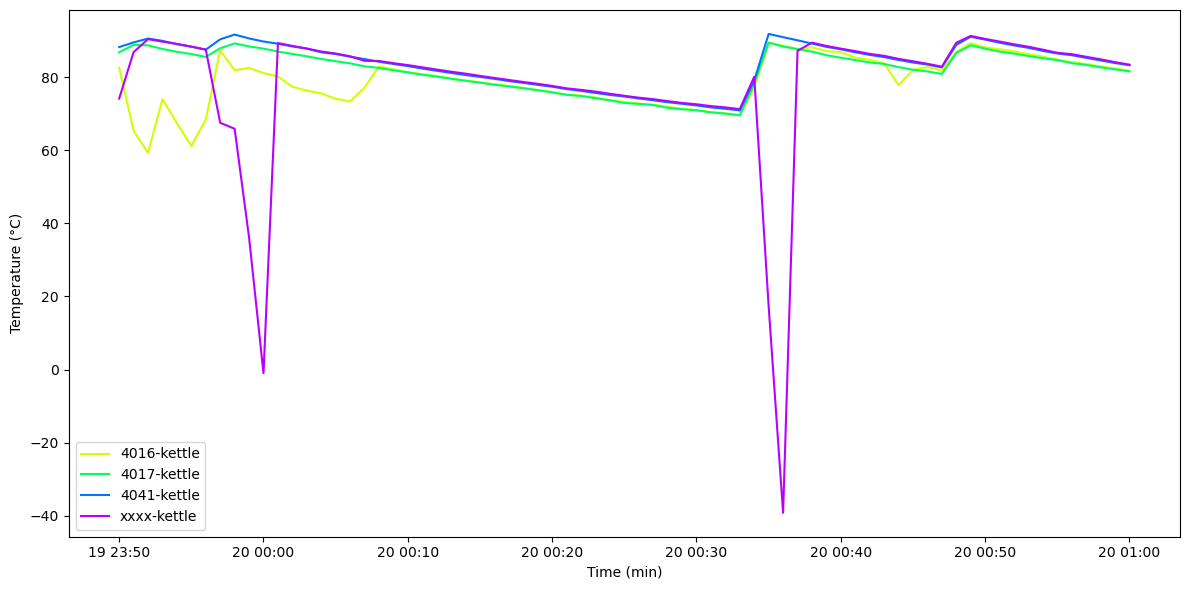

In [3]:
# Use case 1: First tc sensor colocation 
in_folder = r'C:\logger_data\raw\kettle_test'
out_folder = r'C:\logger_data\processed\kettle_test_250220'
start_time = pd.to_datetime('2025-02-19 23:50:00')
end_time = pd.to_datetime('2025-02-20 1:00:00')

df = in_folder_hobo_combine(in_folder, out_folder, start_time, end_time)
# df = df[~(df['file'] == '4013_test_F')]
df['Sensor'] = df['file'].str.split('_').str[0]

## Sketch colocation plot
out_folder = r'C:\EXP\logger_data\processed'
fig_name = 'kettle_test_tc_colocation_250220'
plot_sensor_colocate_t(df, out_folder, fig_name)


C:\Users\MahdaviAl\AppData\Local\Temp\ipykernel_4536\2397335944.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Time'] = pd.to_datetime(df_all['Time'])


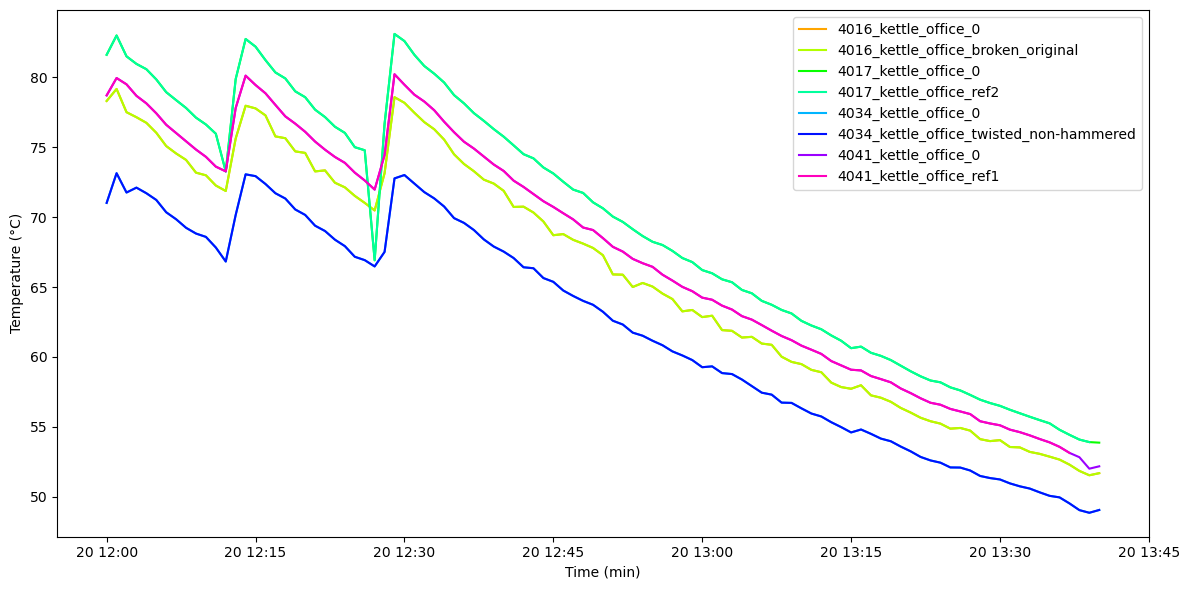

In [4]:
# Use case 1: First tc sensor colocation 
in_folder = r'C:\EXP\logger_data\raw\kettle_test_office'
out_folder = r'C:\EXP\logger_data\processed\kettle_test_office_250220'
start_time = pd.to_datetime('2025-02-20 12:00:00')
end_time = pd.to_datetime('2025-02-20 13:40:00')

df = in_folder_hobo_combine(in_folder, out_folder, start_time, end_time)
df = df[~(df['file'] == '4034_kettle_office_twisted_hammered')]
# df['Sensor'] = df['file'].str.split('_').str[0]
df['Sensor'] = df['file']

## Sketch colocation plot
out_folder = r'C:\EXP\logger_data\processed'
fig_name = 'kettle_test_office_tc_colocation_250220'
plot_sensor_colocate_t(df, out_folder, fig_name)


C:\Users\MahdaviAl\AppData\Local\Temp\ipykernel_4536\2397335944.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Time'] = pd.to_datetime(df_all['Time'])


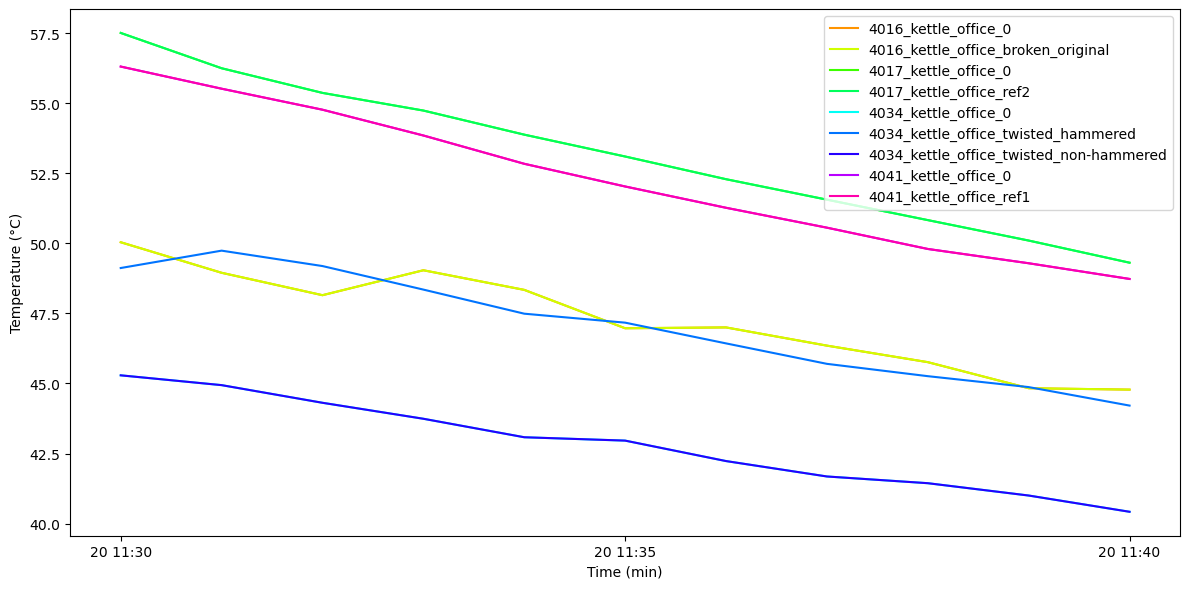

In [5]:
# Use case 1: First tc sensor colocation 
in_folder = r'C:\EXP\logger_data\raw\kettle_test_office'
out_folder = r'C:\EXP\logger_data\processed\kettle_test_office_250220'
start_time = pd.to_datetime('2025-02-20 11:30:00')
end_time = pd.to_datetime('2025-02-20 11:40:00')

df = in_folder_hobo_combine(in_folder, out_folder, start_time, end_time)
# df = df[~(df['file'] == '4034_kettle_office_twisted_hammered')]
# df['Sensor'] = df['file'].str.split('_').str[0]
df['Sensor'] = df['file']

## Sketch colocation plot
out_folder = r'C:\EXP\logger_data\processed'
fig_name = 'kettle_test_office_tc_colocation_250220'
plot_sensor_colocate_t(df, out_folder, fig_name)


C:\Users\MahdaviAl\AppData\Local\Temp\ipykernel_4536\2397335944.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Time'] = pd.to_datetime(df_all['Time'])


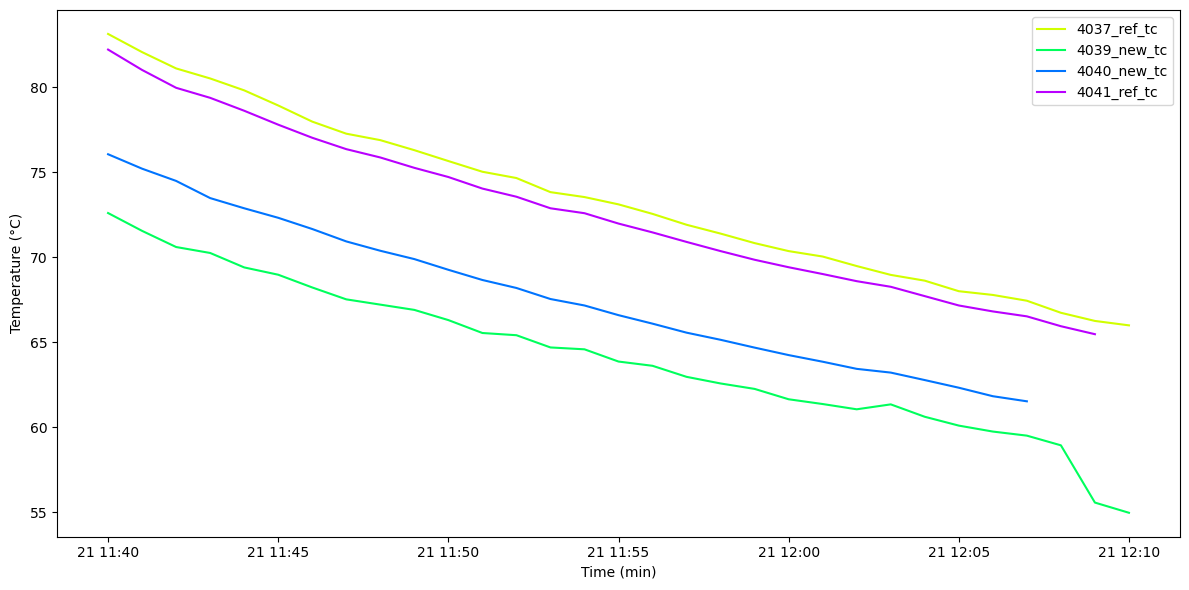

In [6]:
# Use case 1: First tc sensor colocation 
in_folder = r'C:\EXP\logger_data\raw\kettle_test_office_ref&new_250221'
out_folder = r'C:\EXP\logger_data\processed\kettle_test_office_ref&new_250221'
start_time = pd.to_datetime('2025-02-21 11:40:00')
end_time = pd.to_datetime('2025-02-21 12:10:00')

df = in_folder_hobo_combine(in_folder, out_folder, start_time, end_time)
# df = df[~(df['file'] == '4034_kettle_office_twisted_hammered')]
# df['Sensor'] = df['file'].str.split('_').str[0]
df['Sensor'] = df['file']

## Sketch colocation plot
out_folder = r'C:\EXP\logger_data\processed'
fig_name = 'kettle_test_office_ref&new_tc_colocation_250220'
plot_sensor_colocate_t(df, out_folder, fig_name)